<<< [Index](#index.ipynb)
# Combining, Cleaning Data in Analysis and Case Study

The ability to transform and combine your data is a crucial skill in data science, because your data may not always come in one monolithic file or table for you to load. A large dataset may be broken into separate datasets to facilitate easier storage and sharing. Or if you are dealing with time series data, for example, you may have a new dataset for each day. No matter the reason, it is important to be able to combine datasets so you can either clean a single dataset, or clean each dataset separately and then combine them later so you can run your analysis on a single dataset. In this chapter, you'll learn all about combining data.



* ## Combining Data in Analyis

* [Concatenating Data](#concat)
   * [Combining rows of data](#rows)
   * [Combining columns of data](#col)
* [Finding and concatenating data](#find)
   * [finding files that match a pattern](#pattern)
   * [Iterating and concatenating all matches](#matches)
*  [Merge data](#merge)
   * [ 1-1 data merge](#one)
   * [Many to 1 data merge](#m1erge)
   * [Many to many data merge](#mmerge)
   

* ## [Cleaning data for analysis](#clean) 
    * [Data types](#dt)
       * [Converting data types](#cdt)
       * [Working with numeric data](#ndt)
    * [Using Regular Expressions to clean strings](#strings)
       * [String parsing with regular expressions](#stpar)
       * [Extracting numerical values from strings](#num)
       * [Pattern Matching](#pattern2)
    * [Using Functions to clean data](#fclean)
       * [Custom Function to clean data](#ccflean)
       * [Lambda Functions](#lambda)
    * [Duplicate and missing data](#dupl)
       * [Dropping Duplicate Data](#ddupl)
       * [Filling missing Data](#fmiss)
    * [Testing with asserts](#assert)
       * [Testing Your data with asserts](#tasserts)
       
* ### [Case Study](#case)
  * [Putting it all together](#put)
      * [Exploratory analysis]
      * [Visualizing data]
      * [Think about the question at hand]
      * [Assembling your data]
  * [Initial Impression of the data](#initial)
      * [Reshaping your data]
      * [Checking the data types]
      * [Looking at country spellings]
      * [More dat cleaning and processing]
      * [Wrapping up]
  * [Final thoughts](#final)

# Initial Processing of Data

In [33]:
import pandas as pd
import numpy as np
from sqlite3 import dbapi2 as sq3

In [34]:
uberdata = pd.read_csv('./data/nyc_uber_2014.csv', index_col=0)
ebola = pd.read_csv('./data/ebola.csv')

print(uberdata.shape)
uberdata.head()

(297, 4)


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [35]:
uberdata['Date/Time'] = pd.to_datetime(uberdata['Date/Time'], format='%m/%d/%Y %H:%M:%S')
uberdata['Date/Time'].head()

0   2014-04-01 00:11:00
1   2014-04-01 00:17:00
2   2014-04-01 00:21:00
3   2014-04-01 00:28:00
4   2014-04-01 00:33:00
Name: Date/Time, dtype: datetime64[ns]

In [36]:
uber1 = uberdata[uberdata['Date/Time'].map(lambda x: x.month) == 4]
uber2 = uberdata[uberdata['Date/Time'].map(lambda x: x.month) == 5]
uber3 = uberdata[uberdata['Date/Time'].map(lambda x: x.month) == 6]
print(uber1.shape)
print(uber2.shape)
print(uber3.shape)

uber1.to_csv('./data/data2/uberApril14.csv')
uber2.to_csv('./data/data2/uberMay14.csv')
uber3.to_csv('./data/data2/uberJune14.csv')

(99, 4)
(99, 4)
(99, 4)


In [37]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [38]:
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')
ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [39]:
a = ebola_melt['type_country'].str.split('_')

ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [40]:
status = a.str.get(0)
country = a.str.get(1)
status_country =pd.concat([status, country], axis = 1, names = ['status', 'country'])
status_country.columns = ['status', 'country']
status_country.head()

,status,country
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


In [41]:
db = sq3.connect('./data/survey.db')
site =   pd.read_sql("SELECT * FROM Site;", db)
visited = pd.read_sql("SELECT * FROM Visited;", db)
survey = pd.read_sql("SELECT * FROM Survey;", db)

<a id = 'concat'> <a> 
## Concatenating Data

<a id = 'rows'> <a> 
### Combining rows of data

In [42]:
row_concat = pd.concat([uber1, uber2, uber3])
print(row_concat.shape)
row_concat.head()

(297, 4)


,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


<p id = 'col'> <p> 
### Combining columns of data
    
To perform this action, you use the same `pd.concat()` function, but this time with the keyword argument `axis=1`. The default, `axis=0`, is for a row-wise concatenation

In [43]:
print(ebola_melt.shape)
ebola_melt.head()


(1952, 4)


,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [44]:
print(status_country.shape)
status_country.head()

(1952, 2)


,status,country
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


In [45]:
ebola_tidy = pd.concat([ebola_melt, status_country], axis =1 )
print(ebola_tidy.shape)
ebola_tidy.head()

(1952, 6)


,Date,Day,type_country,counts,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


<a id = 'find'> <a> 
## Finding and concatenating data

<a id = 'pattern'> <a> 
### finding files that match a pattern

### Globbing

* Pattern matching for file names
* Wildcards: *?
    * Any csv file: *.csv
    * Any single character: file_?.csv
* Returns a `list` of file names
* Can use this `list` to load into separate `dataframes`

In [46]:
import glob

In [47]:
csv_files = glob.glob('./data/data2/*.csv')

In [48]:
csv_files

['./data/data2/uberMay14.csv',
 './data/data2/uberJune14.csv',
 './data/data2/uberApril14.csv']

In [49]:
uberJ14 = pd.read_csv(csv_files[1], index_col=0 )

uberJ14.head()

,Date/Time,Lat,Lon,Base
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512


<a id = 'matches'> <a> 
### Iterating and concatenating all matches

In [50]:
frames = [pd.read_csv(i, index_col=0)  for i in csv_files]
print(type(frames))
print(type(frames[0]))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [51]:
uber14 = pd.concat(frames)
uber14.shape

(297, 4)

<a id = 'merge'> <a> 
## Merge data

Here, we'll be using survey data that contains readings that William Dyer, Frank Pabodie, and Valentina Roerich took in the late 1920 and 1930 while they were on an expedition towards Antarctica

<a id = 'one'> <a> 
###  1-1 data merge
    
There are NO duplicate value in each column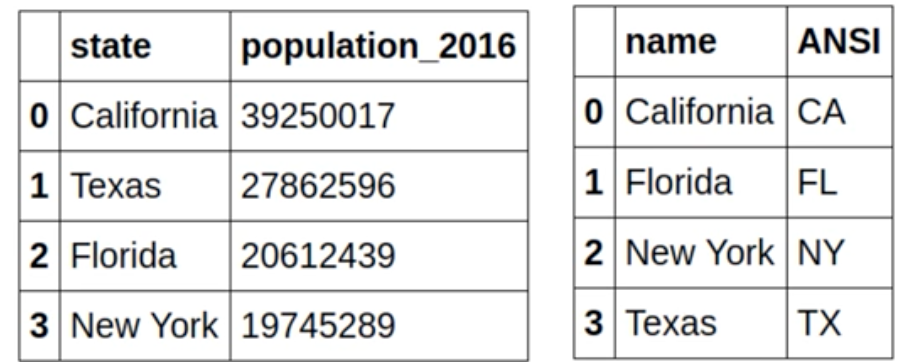

In [52]:

visited

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,None
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [53]:

site


,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [54]:
visited2 = visited.loc[[0,2,6], :]
visited2.head()

,id,site,dated
0,619,DR-1,1927-02-08
2,734,DR-3,1930-01-07
6,837,MSK-4,1932-01-14


In [55]:
o2o = pd.merge(left =site , right =visited2 , left_on='name' , right_on='site')
o2o.head()

,name,lat,long,id,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1930-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


<a id = 'm1erge'> <a> 
### Many to 1 data merge
  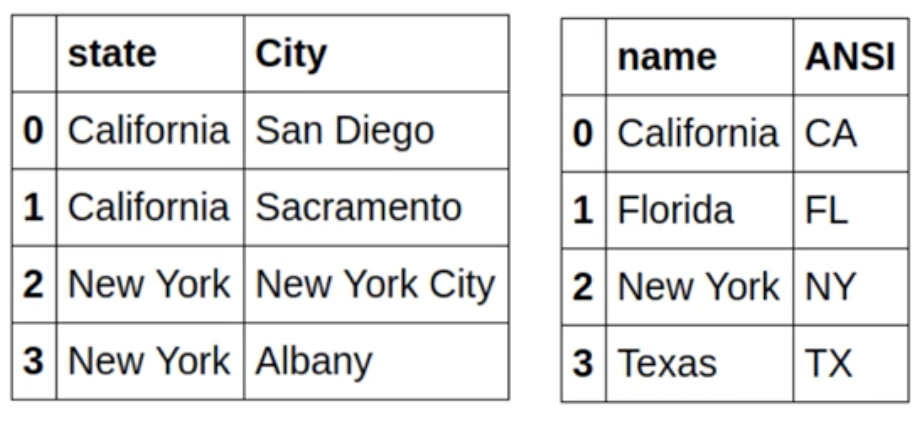
    
There are Mutiple cities in each state.
When we combine, the values from other key will repeated to fill in duplicates.

In a many-to-one (or one-to-many) merge, one of the values will be duplicated and recycled in the output.

In [56]:
visited

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,None
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [57]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [58]:
m2o = pd.merge(left = site, right = visited, left_on='name', right_on='site')
m2o

,name,lat,long,id,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1930-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,None
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [59]:
m2o = pd.merge(left = visited, right = site, left_on='site', right_on='name')
m2o

,id,site,dated,name,lat,long
0,619,DR-1,1927-02-08,DR-1,-49.85,-128.57
1,622,DR-1,1927-02-10,DR-1,-49.85,-128.57
2,844,DR-1,1932-03-22,DR-1,-49.85,-128.57
3,734,DR-3,1930-01-07,DR-3,-47.15,-126.72
4,735,DR-3,1930-01-12,DR-3,-47.15,-126.72
5,751,DR-3,1930-02-26,DR-3,-47.15,-126.72
6,752,DR-3,None,DR-3,-47.15,-126.72
7,837,MSK-4,1932-01-14,MSK-4,-48.87,-123.40


<a id = 'mmerge'> <a> 
### Many to many data merge


In [60]:
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')
m2m

,name,lat,long,id,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1930-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,None
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [61]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,None,sal,0.06
9,735,None,temp,-26.00


In [62]:
# Merge m2m and survey: m2m
s = pd.merge(left=m2m, right=survey, left_on='id', right_on='taken')
s

,name,lat,long,id,site,dated,taken,person,quant,reading
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,DR-1,-49.85,-128.57,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,DR-1,-49.85,-128.57,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,DR-1,-49.85,-128.57,844,DR-1,1932-03-22,844,roe,rad,11.25
5,DR-3,-47.15,-126.72,734,DR-3,1930-01-07,734,pb,rad,8.41
6,DR-3,-47.15,-126.72,734,DR-3,1930-01-07,734,lake,sal,0.05
7,DR-3,-47.15,-126.72,734,DR-3,1930-01-07,734,pb,temp,-21.50
8,DR-3,-47.15,-126.72,735,DR-3,1930-01-12,735,pb,rad,7.22
9,DR-3,-47.15,-126.72,735,DR-3,1930-01-12,735,None,sal,0.06


<p id = 'clean'> <p>
## Cleaning data for analysis 

<p id = 'dt' > <p>
## Data types

<p id = 'cdt' > <p>
### Converting data types

In [63]:
tips = pd.read_csv('./data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [65]:
tips.sex= tips.sex.astype('category')
tips.smoker = tips.smoker.astype('category')

In [66]:
tips.total_bill[0:2] 

0    16.99
1    10.34
Name: total_bill, dtype: float64

<p id = 'ndt' > <p>
### Working with numeric data

In [67]:
tips.total_bill =  tips.total_bill.astype('object')
tips.tip = tips.total_bill.astype('object')

In [68]:
# Polluting Data
tips.total_bill.iloc[[1, 13, 15]] = 'N'
tips.tip.iloc[[2, 14, 78]] ='N' 


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [69]:
tips.dtypes

total_bill      object
tip             object
sex           category
smoker        category
day             object
time            object
size             int64
dtype: object

In [70]:
pd.to_numeric(tips.total_bill)

ValueError: Unable to parse string "N" at position 1

In [71]:
# Tiding Data
tips.total_bill = pd.to_numeric(tips.total_bill, errors='coerce' )
tips.tip = pd.to_numeric(tips.tip, errors='coerce')

In [72]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,16.99,Female,No,Sun,Dinner,2
1,NaN,10.34,Male,No,Sun,Dinner,3
2,21.01,NaN,Male,No,Sun,Dinner,3
3,23.68,23.68,Male,No,Sun,Dinner,2
4,24.59,24.59,Female,No,Sun,Dinner,4


<p id = 'strings' > <p>
## Using Regular Expressions to clean strings
    
The regular expression module in python is `re`. When performing pattern matching on data, since the pattern will be used for a match across multiple rows, it's better to compile the pattern first using `re.compile()`, and then use the compiled pattern to match values.



<p id = 'stpar' > <p>
### String parsing with regular expressions

In [73]:
import re

Compile a pattern that matches a phone number of the format xxx-xxx-xxxx.

In [74]:
# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

In [75]:
# See if the pattern matches. Using Compiled Pattern to match values
result1 = prog.match('123-456-7890')
result2 = prog.match('satyam')
result3 = prog.match('95-99-7393-39')

In [76]:
print(bool(result1), bool(result2), bool(result3))

True False False


In [77]:
# Alternative short cut but NOT optimised
bool(re.match('\d{3}-\d{3}-\d{4}', '123-456-7890'))

True

<p id = 'num' > <p>
### Extracting numerical values from strings
When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the `re.findall()` function. We pass in a pattern and a string to re.findall(), and it will return a list of the matches.

In [78]:
text = 'The reciepe call for 10 strawberies and 1 Banana'

In [79]:
matches = re.findall('\d+', text)
matches

['10', '1']

<p id = 'pattern2' > <p>
### Pattern Match

In [80]:

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

True


In [81]:
# Write the third pattern
pattern3 = bool(re.match(pattern='Australia', string='Australia'))
print(pattern3)



True


<p id = 'd' > <p>
## Using Functions to clean data

<p id = 'fclean' > <p>
### Custom Function to clean data
    
Your job is to write a function that will recode 'Female' to 0, 'Male' to 1, and return np.nan for all entries of 'sex' that are neither 'Female' nor 'Male'.

In [82]:
tips = pd.read_csv('./data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [83]:
def recode_gender(gender):
    if (gender =='Male'):
        return (1)
    elif (gender =='Female'):
        return 0
    else: 
        return np.nan
    

In [84]:
tips['recode'] =tips.sex.apply(recode_gender)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,recode
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [85]:
type(tips.sex.apply(recode_gender))

pandas.core.series.Series

<p id = 'lambda' > <p>
### Lambda Functions

In [86]:
# Pre Work
#tips['total_dollar'] = 
tips.total_bill=tips.total_bill.astype('str')
tips['total_dollar'] = '$'+tips.total_bill
tips.head()

,total_bill,tip,sex,smoker,day,time,size,recode,total_dollar
0,16.99,1.01,Female,No,Sun,Dinner,2,0,$16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,1,$10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,1,$21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,1,$23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,0,$24.59


In [87]:
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))
tips.head()

,total_bill,tip,sex,smoker,day,time,size,recode,total_dollar,total_dollar_replace
0,16.99,1.01,Female,No,Sun,Dinner,2,0,$16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,1,$10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,1,$21.01,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,1,$23.68,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,0,$24.59,24.59


In [88]:
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,recode,total_dollar,total_dollar_replace,total_dollar_re
0,16.99,1.01,Female,No,Sun,Dinner,2,0,$16.99,16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,1,$10.34,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,1,$21.01,21.01,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,1,$23.68,23.68,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,0,$24.59,24.59,24.59


<p id = 'dupl' > <p>
## Duplicate and missing data
Duplicate data causes a variety of problems. From the point of view of performance, they use up unnecessary amounts of memory and cause unneeded calculations to be performed when processing data. In addition, they can also bias any analysis results.
    
 ### Duplicate Data
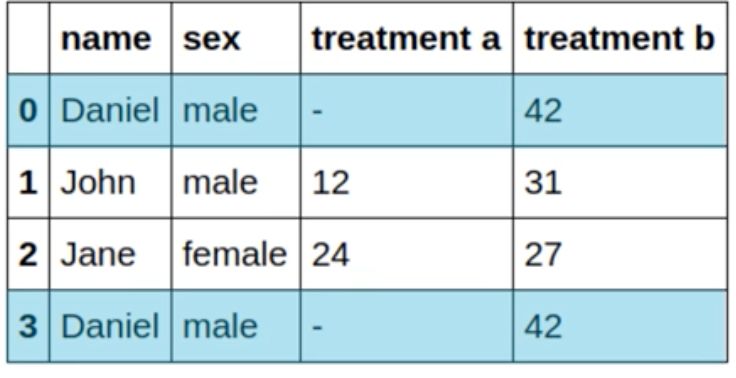
### Missing Data
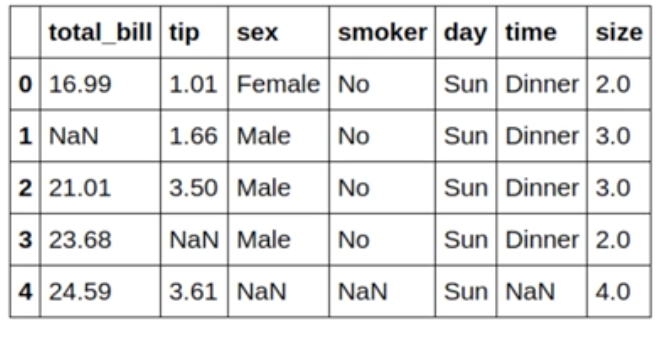


<p id = 'ddupl' > <p>
### Dropping Duplicate Data
    
Dropping Duplicate Data with help of `drop_duplicate` method.

In [89]:
billboard = pd.read_csv('./data/billboard.csv')
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# Pre learning work @ creating duplicates
billboard = pd.concat([billboard, billboard, billboard, billboard, billboard], ignore_index=True)

In [91]:
# Create the new DataFrame: tracks
tracks = billboard[['year', 'artist.inverted', 'track', 'time']]

# Print info of tracks
print(tracks.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 4 columns):
year               1585 non-null int64
artist.inverted    1585 non-null object
track              1585 non-null object
time               1585 non-null object
dtypes: int64(1), object(3)
memory usage: 49.6+ KB
None


In [92]:
# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
print(tracks_no_duplicates.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 4 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
dtypes: int64(1), object(3)
memory usage: 12.4+ KB
None


<p id = 'fmiss' > <p>
### Filling Missing Data
It's rare to have a (real-world) dataset without any missing values, and it's important to deal with them because certain calculations cannot handle missing values while some calculations will, by default, skip over any missing values.  
    Also, understanding how much missing data you have, and thinking about where it comes from is crucial to making unbiased interpretations of data.





In [93]:
airquality = pd.read_csv('./data/airquality.csv')
print(airquality.info())
print()
print('Note that Ozone variable has ', 153-116, ' missing values')
airquality.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB
None

Note that Ozone variable has  37  missing values


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [94]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()
oz_mean


42.12931034482759

In [95]:
# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality.fillna(oz_mean)
airquality.info()
print()
print('Now Ozone variable has ', 0, ' missing values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB

Now Ozone variable has  0  missing values


<p id = 'assert' > <p>
## Testing with asserts

<p id = 'tasserts' > <p>
### Testing Your data with asserts
Here, you'll practice writing assert statements using the Ebola dataset from previous chapters to programmatically check for missing values and to confirm that all values are positive. The dataset has been pre-loaded into a DataFrame called ebola.



In [96]:
ebola  = pd.read_csv('./data/ebola.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [97]:
pd.notnull(ebola).head()


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,True,True,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False
1,True,True,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False
2,True,True,True,True,True,False,False,False,False,False,True,True,True,False,False,False,False,False
3,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,True,True,True,True,True,False,False,False,False,False,True,True,True,False,False,False,False,False


In [98]:
pd.notnull(ebola).all()

Date                    True
Day                     True
Cases_Guinea           False
Cases_Liberia          False
Cases_SierraLeone      False
Cases_Nigeria          False
Cases_Senegal          False
Cases_UnitedStates     False
Cases_Spain            False
Cases_Mali             False
Deaths_Guinea          False
Deaths_Liberia         False
Deaths_SierraLeone     False
Deaths_Nigeria         False
Deaths_Senegal         False
Deaths_UnitedStates    False
Deaths_Spain           False
Deaths_Mali            False
dtype: bool

In [99]:
pd.notnull(ebola).all().all()

False

In [100]:
# Assert that there are no missing values

assert pd.notnull(ebola).all().all()

AssertionError: 

In [101]:
# Assert that all values are >= 0
assert (ebola >= 0).all().all()


AssertionError: 

----
----
<p id ='case'> <p>
## Case Study

<p id = 'put'> <p> 
## Putting it all together
      

<p id='exp'><p>
### Exploratory analysis

In [102]:
gapminder = pd.read_csv('./data/gapminder2.csv', index_col=0)

gapminder.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [103]:
gapminder.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            250, 251, 252, 253, 254, 255, 256, 257, 258, 259],
           dtype='int64', length=780)

In [104]:
gapminder = gapminder[:260]

In [105]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Columns: 218 entries, 1800 to Life expectancy
dtypes: float64(217), object(1)
memory usage: 444.8+ KB


In [106]:
gapminder.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [107]:
gapminder.tail()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yugoslavia
256,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zambia
257,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Åland
259,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Sudan


In [108]:
gapminder = pd.concat([gapminder.loc[:, ['Life expectancy']], gapminder.loc[:, '1800':'1899']], axis = 1)

In [109]:
gapminder.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,...,32.291045,32.475373,32.478408,32.533085,32.747214,32.811841,32.895224,32.964279,32.994080,32.962985
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,...,5.907298,5.734794,5.825318,6.018269,5.822354,6.067020,6.344388,6.390669,6.336805,6.325265
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,4.000000,8.000000,14.000000,8.000000,22.180000,22.000000,20.000000,19.000000,19.700000,18.900000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,...,29.200000,29.200000,29.000000,29.000000,29.200000,29.200000,29.000000,29.200000,29.160000,29.000000
50%,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,31.500000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
75%,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,33.800000,...,35.000000,35.100000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.180000,35.180000
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,50.480000,51.090000,52.730000,52.580000,52.100000,54.160000,53.840000,54.140000,54.690000,51.620000


<p id='exp'><p>
### Visualizing data

In [110]:
import matplotlib.pyplot as plt

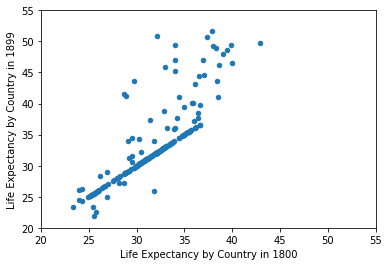

In [111]:
gapminder.plot(kind = 'scatter', x= '1800', y = '1899')
# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

plt.show()

<p id='exp'><p>
### Think about the question at hand

In [112]:
def check_null_or_valid(row_data):
    """
    Function that takes a row of data, drops all missing values, and checks if all remaining values are greater than or equal to 0.
    """    
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    g0 = numeric >= 0
    return g0

In [113]:
# Check whether the first column is 'Life expectancy'
assert gapminder.columns[0]=='Life expectancy'

In [114]:
# Check whether the values in the row are valid
assert gapminder.iloc[:, 1:].apply(check_null_or_valid, axis = 1).all().all()

In [115]:
assert  gapminder['Life expectancy'].value_counts()[0]==1

<p id='exp'><p>
### Assembling your data

<p id = 'initial'> <p> 
## Initial Impression of the data    

<p id='exp'><p>
### Reshaping your data

In [116]:
gapminder_new = pd.read_csv('./data/gapminder2.csv', index_col=0)

gapminder_new.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [117]:
gapminder_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 259
Columns: 218 entries, 1800 to Life expectancy
dtypes: float64(217), object(1)
memory usage: 1.3+ MB


In [118]:
gapminder_melt = gapminder_new.melt(id_vars='Life expectancy')

In [119]:
gapminder_melt.head()

,Life expectancy,variable,value
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [120]:
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

<p id='exp'><p>
### Checking the data types

In [121]:
gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


In [122]:
gapminder_melt['year'] = gapminder_melt['year'].astype(int)

In [123]:
gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null int64
life_expectancy    43857 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ MB


In [124]:
assert gapminder_melt.country.dtypes == np.object


<p id='exp'><p>
### Looking at country spellings
It is reasonable to assume that country names will contain:

* The set of lower and upper case letters.
* Whitespace between words.
* Periods for any abbreviations.  

To confirm that this is the case, you can leverage the power of regular expressions again. 

For common operations like this, Pandas has a built-in string method - `str.contains()` - which takes a regular expression pattern, and applies it to the Series, returning True if there is a match, and False otherwise.

In [125]:
countries  = gapminder_melt.country.drop_duplicates()

In [126]:
mask = countries.str.contains('^[A-Za-z\s\.]*$')

In [127]:
mask_inverse = ~mask


In [128]:
countries.loc[mask_inverse]

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object

<p id='exp'><p>
### More data cleaning and processing]

In [129]:
assert gapminder_melt.country.notnull().all()

In [130]:
assert gapminder_melt.year.notnull().all()

In [131]:
gapminder_melt = gapminder_melt.dropna(how = 'any')

In [132]:
gapminder_melt.shape

(43857, 3)

After dropping the missing values from 'life_expectancy', the number of rows in the DataFrame has gone down from 169260 to 43857. In general, you should avoid dropping too much of your data, but if there is no reasonable way to fill in or impute missing values, then dropping the missing data may be the best solution.



<p id='final'><p>
### Wrapping Up

In [133]:
%matplotlib auto

Using matplotlib backend: TkAgg


In [134]:
plt.subplot(2, 1, 1)

In [135]:
plt.hist(gapminder_melt.life_expectancy)

(array([   30.,   101.,  3427., 17797.,  6971.,  3121.,  3139.,  3345.,
         4574.,  1352.]),
 array([ 1.  ,  9.38, 17.76, 26.14, 34.52, 42.9 , 51.28, 59.66, 68.04,
        76.42, 84.8 ]),
 <a list of 10 Patch objects>)

In [139]:
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

In [140]:
gapminder_agg.head()

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64

In [141]:
gapminder_agg.tail()

year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64

In [142]:
plt.subplot(2,1,2)

In [143]:
plt.plot(gapminder_agg)

In [144]:
plt.close()